# This notebook visualize the similarity result across different conditions for turner mouse organoids dTE analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [2]:
from matplotlib.patches import Patch

In [3]:
import sequence_comparison as seqComp

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## load data and get result summary for randomly selected samples

In [83]:
squire_indiv = pd.read_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/Deseq_indiv_dTE_results.csv", header = 0, index_col = 0 )

In [84]:
squire_df_ind = squire_indiv.index.astype(str) + "_" + squire_indiv['repName']
squire_indiv['df_index_repName'] = squire_df_ind

In [9]:
rand_fnames = pd.Series( os.listdir("./sequence_similarity_results/") )
rand_fnames= rand_fnames[rand_fnames.str.startswith('rand') ]

In [10]:
rand_fnames.iloc[0]

'rand33_1_pairwise_identity.csv'

In [11]:
res1 = pd.read_csv("./sequence_similarity_results/" + rand_fnames.iloc[0], header = 0, index_col = None )

In [12]:
res1.head()

,ID1,ID2,PercentIdentity,Alignment_str
0,12547_B3,13548_ID_B1,49.390244,gctggagggatggcttggtggt-taa-a-ctattgctgagaacct-...
1,12547_B3,5803_RLTRETN_Mm,42.056075,gctgg-ag--------------g---ga----tggcttg---g---...
2,12547_B3,3385_PB1D7,50.609756,-gctgg-aggg-atggcttgg-tg-g-ttaaactat-tgc-tgaga...
3,12547_B3,1971_ID4,43.292683,g--ctggagggatggcttggtggttaaactattgctg-agaacctg...
4,12547_B3,1387_B4A,51.931330,-gctggagggatggcttggtggtta-aactattg-ctga-g-aacc...


In [49]:
rand_summary_df = pd.DataFrame(index = ['avg_pctIdentity', 'std_pctIdentity', 'num_element'])
rand_df_ls = []

for f in rand_fnames:
    # get data meta information
    f_info = f.split("_")[0:2]
    f_id = "_".join( f_info)
    num_elements = int( f_info[0][4::] )
    
    # load df
    df = pd.read_csv("./sequence_similarity_results/" + f, header = 0, index_col = None )
    
    #get avg and std score
    avg_score = df['PercentIdentity'].mean()
    std_score = df['PercentIdentity'].std()

    # add result to the result df
    rand_summary_df[ f_id ] = [ avg_score, std_score, num_elements ]
    rand_df_ls.append( df)
    
    
    

In [50]:
rand_df_ls[0].shape

(528, 4)

In [51]:
rand_summary_df = rand_summary_df.T
rand_summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element
rand33_1,39.721155,15.251149,33.0
rand50_3,38.677348,18.699925,50.0
rand10_1,41.573370,19.112320,10.0
rand20_1,39.613405,17.956531,20.0
rand20_3,40.549803,16.959709,20.0


<Axes: xlabel='num_element', ylabel='avg_pctIdentity'>

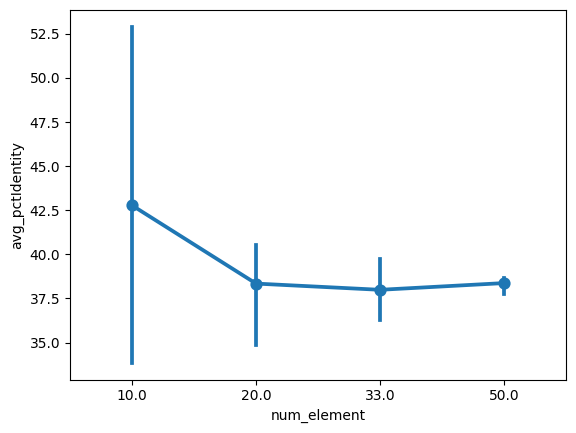

In [28]:
sn.pointplot( data = rand_summary_df, x = 'num_element', y = 'avg_pctIdentity', markers = 'o')

In [34]:
rand_summary_df['condition'] = ['control' for i in rand_summary_df.index ]

## load result and get summary for mutant up condition

In [4]:
mutf = pd.Series( os.listdir("./sequence_similarity_results/") )
mutf = mutf[ mutf.str.startswith('squire')]
mutf

6      squire_top20_df_pairwise_identity.csv
15     squire_top10_df_pairwise_identity.csv
16    squire_last50_df_pairwise_identity.csv
40     squire_top50_df_pairwise_identity.csv
dtype: object

In [5]:
mut_summary_df = pd.DataFrame(index = ['avg_pctIdentity', 'std_pctIdentity', 'num_element'])
mut_df_ls = []

for mf in mutf:
    # get data meta information
    f_info = mf.split("_")[1]
    f_id = 'mut_up_' + f_info
    num_elements = int( f_info[-2::] )
    
    # load df
    df = pd.read_csv("./sequence_similarity_results/" + mf, header = 0, index_col = None )
    
    #get avg and std score
    avg_score = df['PercentIdentity'].mean()
    std_score = df['PercentIdentity'].std()

    # add result to the result df
    mut_summary_df[ f_id ] = [ avg_score, std_score, num_elements ]
    mut_df_ls.append( df )
    
    
    

In [6]:
mut_df_ls[0].shape

(190, 4)

In [7]:
mut_summary_df

,mut_up_top20,mut_up_top10,mut_up_last50,mut_up_top50
avg_pctIdentity,30.920809,29.135368,30.864983,31.567832
std_pctIdentity,26.255202,23.714132,20.974193,24.140729
num_element,20.000000,10.000000,50.000000,50.000000


In [8]:
mut_summary_df =mut_summary_df.T
mut_summary_df['condition'] = ['mutant_up' for i in  mut_summary_df.index]
mut_summary_df

,avg_pctIdentity,std_pctIdentity,num_element,condition
mut_up_top20,30.920809,26.255202,20.0,mutant_up
mut_up_top10,29.135368,23.714132,10.0,mutant_up
mut_up_last50,30.864983,20.974193,50.0,mutant_up
mut_up_top50,31.567832,24.140729,50.0,mutant_up


## load result and get summary for WT conditon

In [9]:
wf = pd.Series( os.listdir("./sequence_similarity_results/") )
wf = wf[ wf.str.startswith('wt')]
wf

11    wt_top_all_df_pairwise_identity.csv
42      wt_top20_df_pairwise_identity.csv
47      wt_top10_df_pairwise_identity.csv
dtype: object

In [10]:
w_summary_df = pd.DataFrame(index = ['avg_pctIdentity', 'std_pctIdentity', 'num_element'])
wt_nums = [33,20,10]
wt_ids = [ f'wt_up_{i}' for i in wt_nums ]
wt_df_ls = []

for i,w in enumerate(wf):
    # get data meta information
    f_id = wt_ids[i]
    num_elements = wt_nums[i]
    
    # load df
    print( 'reading ' + w )
    df = pd.read_csv("./sequence_similarity_results/" + w, header = 0, index_col = None )
    
    #get avg and std score
    avg_score = df['PercentIdentity'].mean()
    std_score = df['PercentIdentity'].std()

    # add result to the result df
    w_summary_df[ f_id ] = [ avg_score, std_score, num_elements ]
    wt_df_ls.append( df )
    
    
    

reading wt_top_all_df_pairwise_identity.csv
reading wt_top20_df_pairwise_identity.csv
reading wt_top10_df_pairwise_identity.csv


In [11]:
wt_df_ls[0].shape

(528, 4)

In [12]:
w_summary_df

,wt_up_33,wt_up_20,wt_up_10
avg_pctIdentity,29.435993,27.326824,24.427313
std_pctIdentity,19.757601,19.316601,18.360094
num_element,33.000000,20.000000,10.000000


In [13]:
w_summary_df =w_summary_df.T
w_summary_df['condition'] = ['wt_up' for i in  w_summary_df.index]
w_summary_df

,avg_pctIdentity,std_pctIdentity,num_element,condition
wt_up_33,29.435993,19.757601,33.0,wt_up
wt_up_20,27.326824,19.316601,20.0,wt_up
wt_up_10,24.427313,18.360094,10.0,wt_up


## plot combined result

In [41]:
comb_df = pd.concat( [ rand_summary_df, mut_summary_df, w_summary_df ], axis = 0,)
comb_df.shape

(19, 4)

In [42]:
comb_df

,avg_pctIdentity,std_pctIdentity,num_element,condition
rand33_1,39.721155,15.251149,33.0,control
rand50_3,38.677348,18.699925,50.0,control
rand10_1,41.573370,19.112320,10.0,control
rand20_1,39.613405,17.956531,20.0,control
rand20_3,40.549803,16.959709,20.0,control
rand20_2,34.869574,20.738495,20.0,control
rand10_2,33.855872,20.000627,10.0,control
rand10_3,52.896826,15.333028,10.0,control
rand33_2,36.283183,17.413158,33.0,control
rand50_1,37.752105,17.934334,50.0,control


<Axes: xlabel='num_element', ylabel='avg_pctIdentity'>

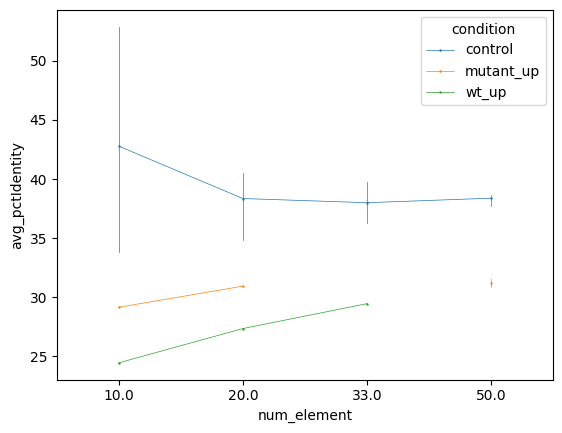

In [48]:
sn.pointplot( data = comb_df, x = 'num_element', y = 'avg_pctIdentity', markers = 'o', hue = 'condition',linewidth=0.5,)

<Axes: xlabel='num_element', ylabel='std_pctIdentity'>

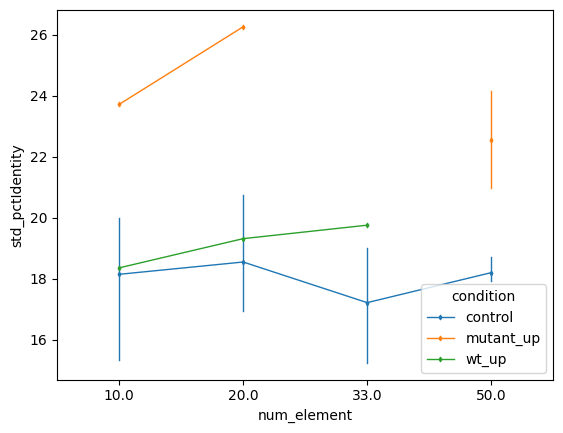

In [59]:
sn.pointplot( data = comb_df, x = 'num_element', y = 'std_pctIdentity', markers = 'd', hue = 'condition',linewidth=1,)

In [68]:
comb_df.sort_values( by = ['condition' , 'num_element'], inplace=True)

In [70]:
comb_df

,avg_pctIdentity,std_pctIdentity,num_element,condition
rand10_1,41.573370,19.112320,10.0,control
rand10_2,33.855872,20.000627,10.0,control
rand10_3,52.896826,15.333028,10.0,control
rand20_1,39.613405,17.956531,20.0,control
rand20_3,40.549803,16.959709,20.0,control
rand20_2,34.869574,20.738495,20.0,control
rand33_1,39.721155,15.251149,33.0,control
rand33_2,36.283183,17.413158,33.0,control
rand33_3,37.970343,18.998045,33.0,control
rand50_3,38.677348,18.699925,50.0,control


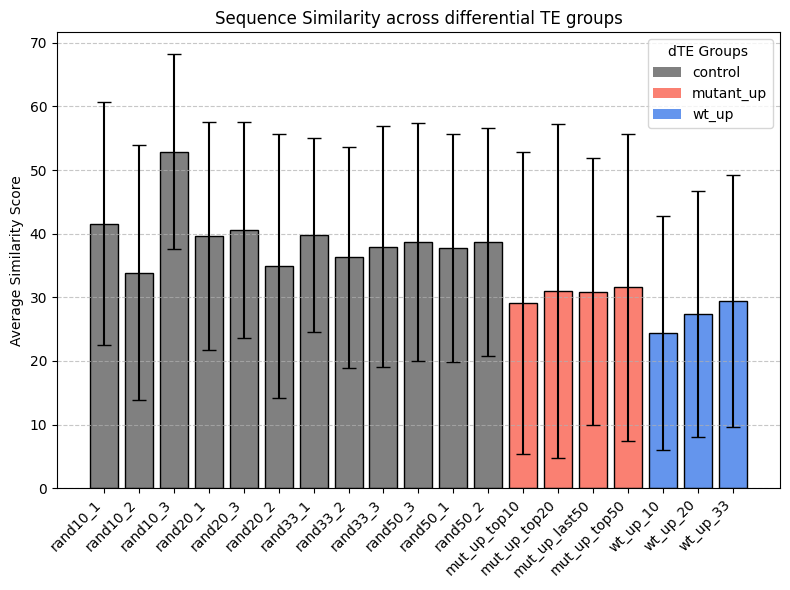

In [72]:
condition_colors = {
    'control': 'gray',
    'mutant_up': 'salmon',
    'wt_up':'cornflowerblue'
}
bar_colors = [condition_colors[cond] for cond in comb_df['condition'] ]

plt.figure(figsize=(8, 6))


plt.bar(comb_df.index, comb_df['avg_pctIdentity'] , yerr=comb_df['std_pctIdentity'], capsize=5, color=bar_colors, edgecolor='black')

plt.xticks(rotation=45, ha='right') 

legend_elements = [Patch(facecolor=color, label=cond) for cond, color in condition_colors.items()]
plt.legend(handles=legend_elements, title='dTE Groups ')

plt.ylabel('Average Similarity Score')
plt.title('Sequence Similarity across differential TE groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()




## print sequence alignment

In [74]:
rand_summary_df.index

Index(['rand33_1', 'rand50_3', 'rand10_1', 'rand20_1', 'rand20_3', 'rand20_2',
       'rand10_2', 'rand10_3', 'rand33_2', 'rand50_1', 'rand50_2', 'rand33_3'],
      dtype='object')

In [ ]:
rand_df_ls

In [75]:
rand_10_1_df = rand_df_ls[2]
rand_10_1_df.shape

(45, 4)

In [76]:
rand_10_1_df.head()

,ID1,ID2,PercentIdentity,Alignment_str
0,10253_RSINE1,10764_PB1D7,62.601626,--c---t--gg-a-gagatggctcag-cag-gtaaagtcctt-gc-...
1,10253_RSINE1,2914_B1_Mur2,56.643357,-ctggagaga--tggct--cagca------g-gta---a---agtc...
2,10253_RSINE1,7794_Lx9,21.291449,-c----t-------------g--ga---------g-a---------...
3,10253_RSINE1,10913_L1MB5,51.250000,ctggagag-atggctcag-caggtaaa--g---tc-ct-t---gcc...
4,10253_RSINE1,12556_PB1D10,57.377049,ctggag--a-g-atggctcagcaggtaaagtc-cttgccatgaaag...


In [77]:
rand_10_1_df.sort_values( by = 'PercentIdentity', ascending= False, inplace=True )

In [78]:
rand_10_1_df.head()

,ID1,ID2,PercentIdentity,Alignment_str
22,2914_B1_Mur2,13967_ID_B1,64.516129,-gct---ggg-----cctg--g--tga-c--acacaccttgagtc-...
6,10253_RSINE1,6170_RSINE1,63.909774,ct-ggaga-g----a--tgg--ctcagcaggtaaagtccttgccat...
9,10764_PB1D7,2914_B1_Mur2,63.636364,agccgatctgg-ca-tggtgg-ct-cagtc---tgta-a-tct---...
0,10253_RSINE1,10764_PB1D7,62.601626,--c---t--gg-a-gagatggctcag-cag-gtaaagtcctt-gc-...
33,10913_L1MB5,13967_ID_B1,62.500000,tatat-cttc-a---taaactgga--ata-ctat---ttagc-ca-...


In [124]:
%%capture output_rand10_head
for id1, id2, score, aln in rand_10_1_df.head(10).values:
    print( f"Comparing sequences of score {score:.2f}:\n\t{id1}\n\t{id2}")
    aln_ls = aln.split("\n")
    seqComp.alignment_str_parser( aln_ls, line_width = 100, )

In [126]:
with open('./sequence_similarity_results/rand10_1_head_alignment.txt', 'w') as f:
        f.write(output_rand10_head.stdout)

In [128]:
%%capture output_rand10_tail
for id1, id2, score, aln in rand_10_1_df.tail(10).values:
    print( f"Comparing sequences of score {score:.2f}:\n\t{id1}\n\t{id2}")
    aln_ls = aln.split("\n")
    seqComp.alignment_str_parser( aln_ls, line_width = 100, )

In [129]:
with open('./sequence_similarity_results/rand10_1_tail_alignment.txt', 'w') as f:
        f.write(output_rand10_tail.stdout)

## Plot seq-len vs similarity score

In [87]:
squire_indiv.set_index('df_index_repName', inplace=True )

In [88]:
adj_rand_50_3 = seqComp.add_seq_comparison_info( rand_df_ls[1], squire_indiv, merged_result= True )

In [89]:
adj_rand_50_3.head()

,ID1,ID2,PercentIdentity,Alignment_str,seq1_len,seq2_len,total_match,adj_percentIdentity
0,2365_B1F2,556_PB1D10,51.898734,agct--ggata-tggt--gctat-acacctttagt--cctggca-c...,158,101,82,63.320463
1,2365_B1F2,3923_Lx9,59.782609,ag--ctgga-tatggt--gcta-tacacct-ttagt-cctgg---c...,158,184,110,64.327485
2,2365_B1F2,8797_MMVL30-int,63.291139,agctg--gata-tg--g-tg-ctatacacctt-ta---gtcct--g...,158,158,100,63.291139
3,2365_B1F2,14257_RNERVK23-int,34.889435,ag-ctg-----gatatg----g-t-gct---------a-t-aca-c...,158,407,142,50.265487
4,2365_B1F2,2300_LSU-rRNA_Hsa,31.506849,agct-gga---t------a-t-gg-t-gctat---a---ca-cc--...,158,438,138,46.308725


In [96]:
adj_rand_50_3['avg_seq_len'] = adj_rand_50_3[[ 'seq1_len' ,'seq2_len' ]].mean( axis = 1)

In [97]:
adj_rand_50_3.head()

,ID1,ID2,PercentIdentity,Alignment_str,seq1_len,seq2_len,total_match,adj_percentIdentity,avg_seq_len
0,2365_B1F2,556_PB1D10,51.898734,agct--ggata-tggt--gctat-acacctttagt--cctggca-c...,158,101,82,63.320463,129.5
1,2365_B1F2,3923_Lx9,59.782609,ag--ctgga-tatggt--gcta-tacacct-ttagt-cctgg---c...,158,184,110,64.327485,171.0
2,2365_B1F2,8797_MMVL30-int,63.291139,agctg--gata-tg--g-tg-ctatacacctt-ta---gtcct--g...,158,158,100,63.291139,158.0
3,2365_B1F2,14257_RNERVK23-int,34.889435,ag-ctg-----gatatg----g-t-gct---------a-t-aca-c...,158,407,142,50.265487,282.5
4,2365_B1F2,2300_LSU-rRNA_Hsa,31.506849,agct-gga---t------a-t-gg-t-gctat---a---ca-cc--...,158,438,138,46.308725,298.0


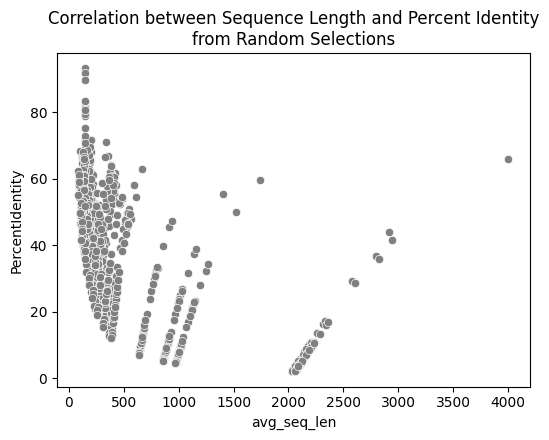

In [115]:
plt.figure( figsize=[5.5, 4.5])
sn.scatterplot( data = adj_rand_50_3, x = 'avg_seq_len' , y = 'PercentIdentity', c = 'gray' )
plt.title("Correlation between Sequence Length and Percent Identity\nfrom Random Selections")
plt.tight_layout()
plt.show()

In [113]:
adj_mut_top50 = seqComp.add_seq_comparison_info( mut_df_ls[3], squire_indiv, merged_result= True )

In [117]:
adj_mut_top50['avg_seq_len'] = adj_mut_top50[[ 'seq1_len' ,'seq2_len' ]].mean( axis = 1)

In [110]:
mut_summary_df

,mut_up_top20,mut_up_top10,mut_up_last50,mut_up_top50
avg_pctIdentity,30.920809,29.135368,30.864983,31.567832
std_pctIdentity,26.255202,23.714132,20.974193,24.140729
num_element,20.000000,10.000000,50.000000,50.000000


In [ ]:
#mut_df_ls[3] #mut_up_top50

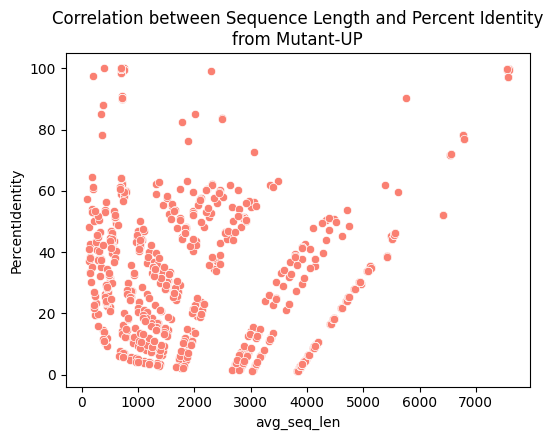

In [118]:
plt.figure( figsize=[5.5, 4.5])
sn.scatterplot( data = adj_mut_top50, x = 'avg_seq_len' , y = 'PercentIdentity', c = 'salmon' )
plt.title("Correlation between Sequence Length and Percent Identity\nfrom Mutant-UP")
plt.tight_layout()
plt.show()

In [114]:
adj_wt_top33 = seqComp.add_seq_comparison_info( wt_df_ls[0], squire_indiv, merged_result= True )

In [119]:
adj_wt_top33['avg_seq_len'] = adj_wt_top33[[ 'seq1_len' ,'seq2_len' ]].mean( axis = 1)

In [111]:
w_summary_df

,wt_up_33,wt_up_20,wt_up_10
avg_pctIdentity,29.435993,27.326824,24.427313
std_pctIdentity,19.757601,19.316601,18.360094
num_element,33.000000,20.000000,10.000000


In [112]:
#wt_df_ls[0] # wt top 33

,ID1,ID2,PercentIdentity,Alignment_str
0,4485_Lx2B2,6115_ORR1B1-int,10.959651,ccatgcaatggaaagaaggaagcatcttcaacatatggtgctggtt...
1,4485_Lx2B2,249_RLTR4_MM-int,25.800536,ccat--g---c----a--------------a-------t-g--g--...
2,4485_Lx2B2,5703_B3,9.760087,ccatgcaatggaaagaaggaagcatcttcaacatatggtgctggtt...
3,4485_Lx2B2,10291_Lx8,25.408942,ccatgcaatggaaagaaggaagcatcttcaacatatggtgctggtt...
4,4485_Lx2B2,4937_MMERVK9E_I,42.080624,----c--c---a--tgca-atggaaa-g-a----a------g----...
...,...,...,...,...
523,9204_IAPEz-int,8898_IAPEz-int,19.553244,-----tg----g---t------g------c---c----g--aat-t...
524,9204_IAPEz-int,8191_B3,29.733959,tggtgccgaattccgggacgagaaattccgggacgagaaaaaatcc...
525,14670_IAPEz-int,8898_IAPEz-int,99.173807,gaacctgataagaggtatcaatggaagatcttaccacagggaatgt...
526,14670_IAPEz-int,8191_B3,6.215554,gaacctgataagaggtatcaatggaagatcttaccacagggaatgt...


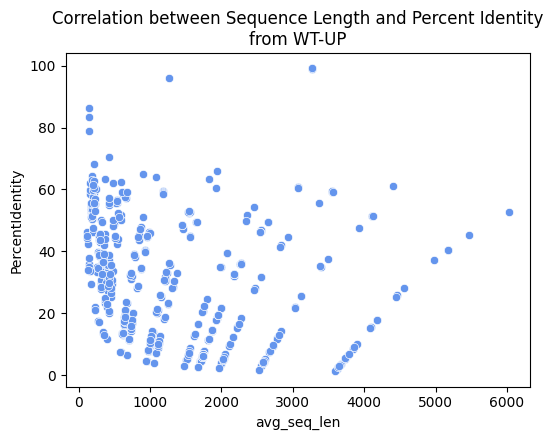

In [122]:
plt.figure( figsize=[5.5, 4.5])
sn.scatterplot( data = adj_wt_top33, x = 'avg_seq_len' , y = 'PercentIdentity', c = 'cornflowerblue' )
plt.title("Correlation between Sequence Length and Percent Identity\nfrom WT-UP")
plt.tight_layout()
plt.show()

## save data

In [14]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0, index_col= 0 )

In [15]:
mut_summary_df.to_csv("squire_tjp2_mut_seq_similarity_summary_df.csv", header = True, index = True)
w_summary_df.to_csv("squire_tjp2_wt_seq_similarity_summary_df.csv", header = True, index = True)

In [16]:
logi['squire_tjp2_mut_seq_similarity_summary_df.csv'] = ['4c' , 'NA' , 'seq similarity summary df for turner mouse TJP2 KO organoids TE, where the TE counts are quantified by squire pipeline']

In [17]:
logi['squire_tjp2_wt_seq_similarity_summary_df.csv'] = ['4c' , 'NA' , 'seq similarity summary df for turner mouse TJP2 WT organoids TE, where the TE counts are quantified by squire pipeline']

In [18]:
logi.to_csv("./OUTPUT_EXPLAIN.csv", header = True , index = True )